<a href="https://colab.research.google.com/github/Anirudh-on-GitHub/DL-Codes/blob/master/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from keras import models,layers
from tensorflow.keras.initializers import RandomNormal
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score

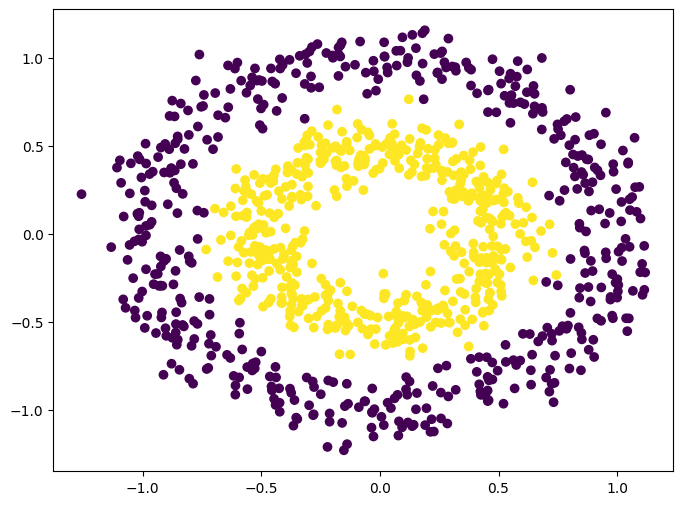

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [ ]:
from keras.layers import LeakyReLU,Activation
class WeightCapture(Callback):
    "Capture the weights of each layer of the model"
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.weights = []
        self.epochs = []

    def on_epoch_end(self, epoch, logs=None):
        self.epochs.append(epoch) # remember the epoch axis
        weight = {}
        for layer in model.layers:
            if not layer.weights:
                continue
            name = layer.weights[0].name.split("/")[0]
            weight[name] = layer.weights[0].numpy()
        self.weights.append(weight)

def make_mlp(activation, initializer, name):
    "Create a model with specified activation and initalizer"
    if activation=="leakyrelu":
      activation=LeakyReLU(alpha=0.05)
    model = models.Sequential([
        layers.Input(shape=(2,), name=name+"0"),
        layers.Dense(5, activation=activation, kernel_initializer=initializer, name=name+"1"),
        layers.Dense(5, activation=activation, kernel_initializer=initializer, name=name+"2"),
        layers.Dense(5, activation=activation, kernel_initializer=initializer, name=name+"3"),
        layers.Dense(5, activation=activation, kernel_initializer=initializer, name=name+"4"),
        layers.Dense(1, activation="sigmoid", kernel_initializer=initializer, name=name+"5")
    ])
    return model

In [ ]:
def plotweight(capture_cb):
    fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True, figsize=(8, 10))
    ax[0].set_title("Mean weight")
    for key in capture_cb.weights[0]:
        ax[0].plot(capture_cb.epochs, [w[key].mean() for w in capture_cb.weights], label=key)
    ax[0].legend()
    ax[1].set_title("S.D.")
    for key in capture_cb.weights[0]:
        ax[1].plot(capture_cb.epochs, [w[key].std() for w in capture_cb.weights], label=key)
    ax[1].legend()
    plt.show()

In [ ]:
initializer = RandomNormal(mean=0, stddev=1)
batch_size = 32
n_epochs = 100

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Before training: Accuracy 0.5
After training: Accuracy 0.995
32/32 [==============================] - 0s 2ms/step - loss: 0.0177 - acc: 0.9950
[0.01772899180650711, 0.9950000047683716]


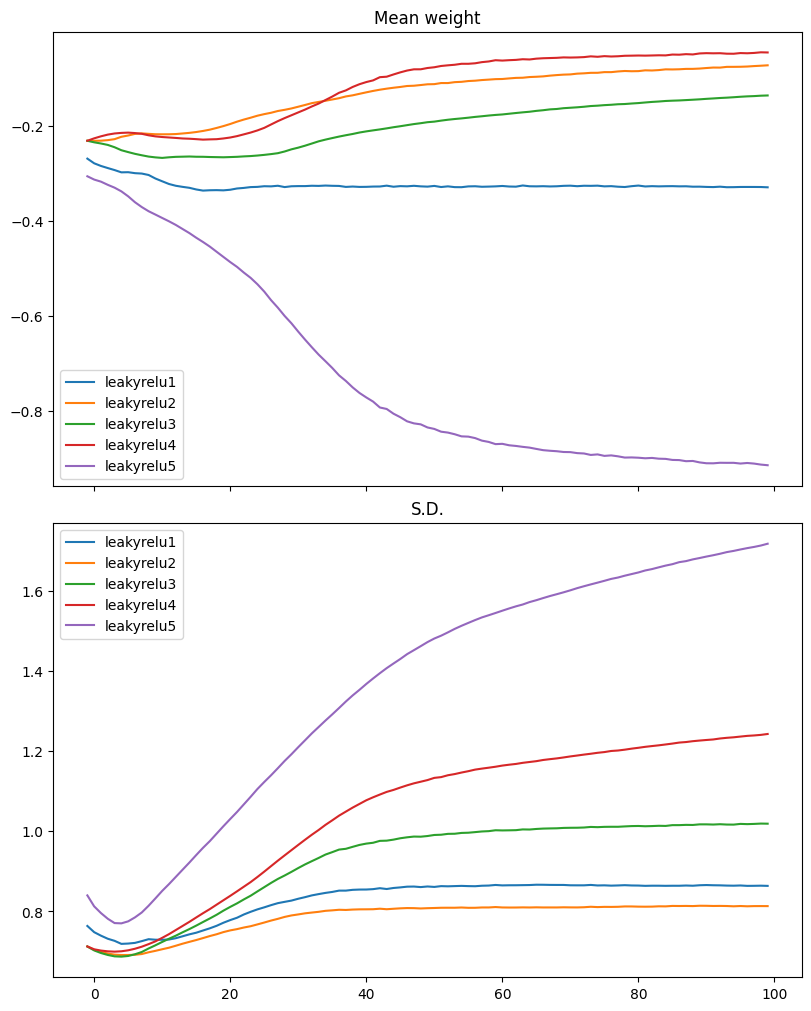

In [ ]:
model = make_mlp("leakyrelu", initializer, "leakyrelu")
capture_cb = WeightCapture(model)
capture_cb.on_epoch_end(-1)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
print("Before training: Accuracy", accuracy_score(y, (model(X).numpy() > 0.5).astype(int)))
model.fit(X, y, batch_size=batch_size, epochs=n_epochs, callbacks=[capture_cb], verbose=0)
print("After training: Accuracy", accuracy_score(y, (model(X).numpy() > 0.5).astype(int)))
print(model.evaluate(X,y))
plotweight(capture_cb)